In [4]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.options.mode.chained_assignment = None

In [5]:
# read the dataset into df
df = pd.read_csv('fifa.csv')

In [6]:
# clean the data by deleting the columns not required for the project
del df["player_url"]
del df["sofifa_id"]
del df["dob"]
del df["height_cm"]
del df["weight_kg"]
del df["international_reputation"]
del df["body_type"]
del df["real_face"]
del df["team_jersey_number"]
del df["loaned_from"]
del df["joined"]
del df["contract_valid_until"]
del df["nation_jersey_number"]
del df["defending_marking"]
del df["ls"]
del df["rs"]
del df["lw"]
del df["lf"]
del df["st"]
del df["cf"]
del df["rf"]
del df["rw"]
del df["lam"]
del df["cam"]
del df["ram"]
del df["lm"]
del df["lcm"]
del df["cm"]
del df["rcm"]
del df["rm"]
del df["lwb"]
del df["ldm"]
del df["cdm"]
del df["rdm"]
del df["rwb"]
del df["lb"]
del df["lcb"]
del df["cb"]
del df["rcb"]
del df["long_name"]
del df["league_rank"]
del df["preferred_foot"]
del df["weak_foot"]
del df["skill_moves"]
del df["player_tags"]
del df["player_traits"]
del df["rb"]
del df["team_position"]
del df["nation_position"]
del df["league_name"]
del df["goalkeeping_handling"]
del df["goalkeeping_reflexes"]
del df["goalkeeping_positioning"]
del df["goalkeeping_diving"]
del df["goalkeeping_kicking"]

# print first five records of the dataset
df.head()

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
1,Cristiano Ronaldo,35,Portugal,Juventus,92,92,46000000,220000,"ST, LW",High/Low,...,78,93,63,29,95,82,84,95,32,24
2,J. Oblak,27,Slovenia,Atlético Madrid,91,93,75000000,125000,GK,Medium/Medium,...,78,12,34,19,11,65,11,68,12,18
3,R. Lewandowski,31,Poland,FC Bayern München,91,91,80000000,240000,ST,High/Medium,...,86,85,81,49,94,79,88,88,42,19
4,Neymar Jr,28,Brazil,Paris Saint-Germain,91,91,90000000,270000,"LW, CAM",High/Medium,...,50,84,51,36,87,90,92,93,30,29


In [7]:
# 3. Midfielders


# 3.1 Defensive Mid

# find the best dms in the game (best 20)

# get all the dm from the dataset
#print(df)
df_dm = df.loc[df['player_positions'].str.contains("DM", case = True)]

df_dm = df_dm.reset_index(drop = True)
df_dm

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,Casemiro,28,Brazil,Real Madrid,89,89,59500000,310000,CDM,High/High,...,91,81,91,87,72,80,66,84,88,87
1,J. Kimmich,25,Germany,FC Bayern München,88,90,65000000,145000,"CDM, RB",High/Medium,...,67,84,89,82,80,84,44,85,84,79
2,N. Kanté,29,France,Chelsea,88,88,51000000,190000,"CDM, CM",Medium/High,...,72,65,90,91,72,79,54,85,90,85
3,Fabinho,26,Brazil,Liverpool,87,89,54500000,155000,CDM,Medium/High,...,81,70,86,87,70,79,90,84,87,85
4,Sergio Busquets,31,Spain,FC Barcelona,87,87,38000000,240000,CDM,Medium/Medium,...,75,54,81,85,77,84,60,93,83,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,A. Al Dheyabi,21,Saudi Arabia,Damac FC,50,59,40000,2000,CDM,Medium/Medium,...,31,28,59,43,29,43,40,40,47,54
2815,M. Mannhardt,17,Germany,TSV 1860 München,49,66,50000,500,CDM,Medium/Medium,...,48,30,57,42,40,42,40,37,44,54
2816,J. Davidson,19,Scotland,Waterford FC,49,60,45000,500,CDM,Medium/Medium,...,67,29,51,47,27,43,35,42,45,53
2817,Cheng Hui,22,China PR,Dalian YiFang FC,49,55,35000,2000,"CDM, RB, CB",Medium/Medium,...,45,30,50,40,42,46,37,40,50,52


In [8]:
for i in range(0, len(df_dm['overall'])):
    if df_dm['overall'][i] > 85:
        df_dm = df_dm.drop(i)

df_dm = df_dm.reset_index(drop=True)

# remove irrelevant columns
df_dm = df_dm.drop(['nationality', 'power_long_shots', 'shooting', 'power_shot_power', 'skill_fk_accuracy', 'attacking_heading_accuracy', 'club_name', 'age', 'value_eur', 'wage_eur', 'player_positions', 'release_clause_eur', 'work_rate', 'gk_reflexes', 'gk_positioning', 'gk_handling', 'gk_diving', 'gk_kicking', 'gk_speed'], axis = 1)

# for safekeeping keep the values in dm dataset
dm = df_dm

# get the top 10 rated defensive midfielders according to their potential
df_dm = df_dm[0:10]
df_dm


,short_name,overall,potential,pace,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,...,power_stamina,power_strength,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,Marquinhos,85,89,72.0,73.0,70.0,87.0,78.0,68,33,...,80,75,80,86,59,68,47,86,87,87
1,S. Milinković-Savić,85,89,69.0,80.0,83.0,79.0,85.0,64,80,...,85,88,79,78,79,85,56,84,79,74
2,Rodri,85,88,65.0,77.0,77.0,82.0,79.0,63,64,...,84,79,76,83,75,82,46,85,84,78
3,M. Pjanić,85,85,67.0,87.0,85.0,75.0,67.0,81,56,...,81,59,70,78,68,88,79,86,76,70
4,Thiago,85,85,64.0,85.0,90.0,70.0,62.0,78,68,...,73,59,54,83,75,85,75,86,71,68
5,L. Goretzka,84,88,78.0,80.0,82.0,77.0,85.0,75,79,...,83,88,81,79,83,82,60,82,79,75
6,W. Ndidi,84,88,71.0,68.0,74.0,87.0,84.0,50,50,...,92,78,87,90,67,67,55,80,89,85
7,M. Brozović,84,85,63.0,80.0,81.0,79.0,78.0,72,69,...,94,69,84,81,70,80,69,82,81,79
8,Fernandinho,84,84,64.0,78.0,78.0,85.0,79.0,68,66,...,78,76,87,89,70,73,61,81,86,83
9,Lucas Leiva,84,84,60.0,76.0,78.0,83.0,71.0,63,62,...,80,61,83,87,66,81,61,86,84,81


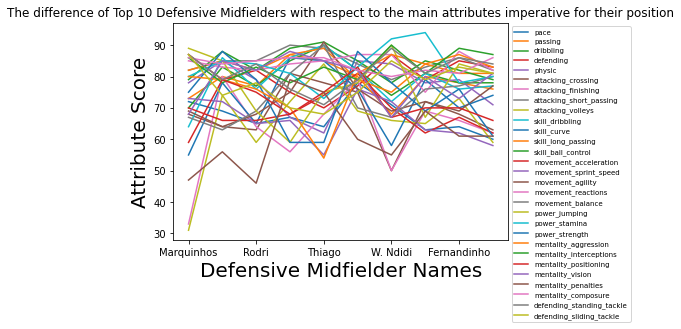

In [9]:
# plot the top 10 dms with their most associated attributes

df_dm.plot(x = 'short_name', y = ['pace', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_standing_tackle', 'defending_sliding_tackle'])
plt.xlabel('Defensive Midfielder Names', fontsize = 20)
plt.ylabel('Attribute Score', fontsize = 20)
plt.title("The difference of Top 10 Defensive Midfielders with respect to the main attributes imperative for their position")
plt.legend(bbox_to_anchor=(1, 1), fontsize = 7)
plt.show()


In [10]:
# get the dm names in names
names_dm = []
names_dm = pd.DataFrame(dm['short_name'])
dm = dm.drop('short_name', axis = 1)
dm = dm.drop('potential', axis = 1)
names_dm.append(df_dm['short_name'])

dm_norm = (dm - dm.mean())/dm.std()

In [11]:
# use Linear Regression to predict the overall of defensive midfielders
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
dm_x = dm_norm.drop('overall', axis = 1)
dm_w = dm_norm['overall']

lm.fit(dm_x,dm_w)
yhat = lm.predict(dm_x)
print(lm.intercept_)
print(lm.coef_)


-8.754934568088831e-16
[ 0.03375675  0.0075048  -0.13436683  0.29613178  0.0691733   0.02478436
  0.00069633  0.12994356  0.0103918   0.07066489  0.01876645  0.05116136
  0.21396984  0.01564373 -0.00281703  0.00484187  0.23257922  0.0063844
 -0.01632968  0.0564153   0.01585585 -0.00451281  0.04049725 -0.05075957
  0.00236323  0.01620089  0.08615457  0.05873108 -0.040501  ]


In [12]:
# get the actual and predicted table for dms
avp = pd.DataFrame({'Actual' : dm_w, 'Predicted' : yhat})
df.sort_index(inplace=True)

add_names = avp.join(names_dm['short_name'])

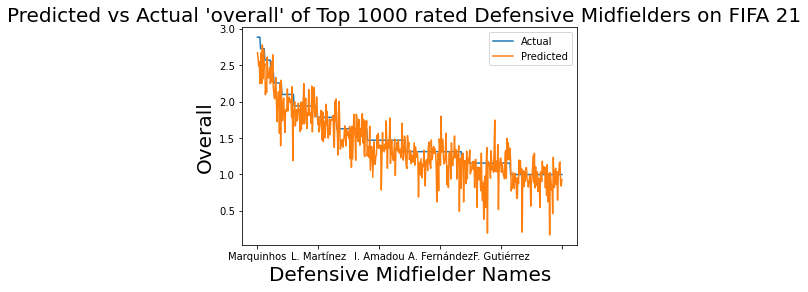

In [13]:
# plot the actual vs predicted of top 500 rated defensive midfielders according
# to their potential

add_names[0:500].plot(x = 'short_name', y = ['Actual','Predicted'])
plt.figtext(.5, .9, "Predicted vs Actual 'overall' of Top 1000 rated Defensive Midfielders on FIFA 21", fontsize = 20, ha = 'center')
plt.xlabel('Defensive Midfielder Names', fontsize = 20)
plt.ylabel('Overall', fontsize = 20)
plt.show()


In [14]:
# get the error rate for linear regression
from sklearn import metrics
from math import sqrt
print('Mean Squared Error:', sqrt(metrics.mean_squared_error(dm_w, yhat)))
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(dm_w, yhat)))

Mean Squared Error: 0.252104241202471
Accuracy: 0.747895758797529


In [15]:
# accuracy for the top 500 defensive midfielders
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(dm_w[:500], yhat[:500])))

Accuracy: 0.7647865568543946
